In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train=pd.read_csv("/content/train_Insurance.csv")
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non


In [ ]:
test=pd.read_csv("/content/test_Insurance - Copie.csv")
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,V,V,V,U,3760.0,Fire-resistive,without,43157,oui
1,H16909,2015,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,58194,non
2,H16867,2013,1.0,1,V,N,O,R,1944.0,Ordinary,6,92050,oui
3,H14813,2015,1.0,0,N,V,V,U,2270.0,Non-combustible,without,13209,oui
4,H3728,2016,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,5177,non


In [ ]:
train.describe(include='all')

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,5012,5012.000000,5012.000000,5012.000000,5012,5012,5008,5012,4935.000000,5012,5012,4939,5012
unique,5012,NaN,NaN,NaN,2,2,2,2,NaN,4,11,1115,2
top,H13501,NaN,NaN,NaN,V,N,O,R,NaN,Non-combustible,without,6088,non
freq,1,NaN,NaN,NaN,3763,2535,2532,2537,NaN,2310,2476,102,3886
mean,NaN,2013.660215,0.869713,0.301077,NaN,NaN,NaN,NaN,1876.898683,NaN,NaN,NaN,NaN
std,NaN,1.383134,0.219496,0.458772,NaN,NaN,NaN,NaN,2267.277397,NaN,NaN,NaN,NaN
min,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,520.000000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN,NaN,NaN,NaN
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2280.000000,NaN,NaN,NaN,NaN


In [ ]:
test.describe(include="all")

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,2147,2147.000000,2147.000000,2147.000000,2147,2147,2144,2147,2118.000000,2147,2147,2118,2147
unique,2147,NaN,NaN,NaN,2,2,2,2,NaN,4,11,714,2
top,H3733,NaN,NaN,NaN,V,V,V,U,NaN,Non-combustible,without,6088,non
freq,1,NaN,NaN,NaN,1619,1074,1074,1074,NaN,995,1074,41,1639
mean,NaN,2013.691197,0.876805,0.315789,NaN,NaN,NaN,NaN,1899.700189,NaN,NaN,NaN,NaN
std,NaN,1.385631,0.215504,0.464938,NaN,NaN,NaN,NaN,2304.300053,NaN,NaN,NaN,NaN
min,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,535.500000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1100.000000,NaN,NaN,NaN,NaN
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2300.000000,NaN,NaN,NaN,NaN


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         2147 non-null   object 
 1   YearOfObservation   2147 non-null   int64  
 2   Insured_Period      2147 non-null   float64
 3   Residential         2147 non-null   int64  
 4   Building_Painted    2147 non-null   object 
 5   Building_Fenced     2147 non-null   object 
 6   Garden              2144 non-null   object 
 7   Settlement          2147 non-null   object 
 8   Building Dimension  2118 non-null   float64
 9   Building_Type       2147 non-null   object 
 10  NumberOfWindows     2147 non-null   object 
 11  Geo_Code            2118 non-null   object 
 12  Claim               2147 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 218.2+ KB


In [ ]:
train.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

In [ ]:
test.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 3
Settlement             0
Building Dimension    29
Building_Type          0
NumberOfWindows        0
Geo_Code              29
Claim                  0
dtype: int64

In [ ]:
train.isnull().sum().sum()

154

In [ ]:
test.isnull().sum().sum()

61

In [ ]:
def t_valeurs_manquantes(df,colName):
  mf_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  df[colName] = mf_imputer.fit_transform(df[[colName]])
  return df

In [ ]:
print(train.isna().sum())
train = t_valeurs_manquantes(train,'Building Dimension')
train = t_valeurs_manquantes(train,'Garden')
train['Geo_Code'].ffill(inplace=True)
print(train.isna().sum())

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64
Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64


In [ ]:
print(test.isna().sum())
test = t_valeurs_manquantes(test,'Building Dimension')
test = t_valeurs_manquantes(test,'Garden')
test['Geo_Code'].ffill(inplace=True)
print(test.isna().sum())

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 3
Settlement             0
Building Dimension    29
Building_Type          0
NumberOfWindows        0
Geo_Code              29
Claim                  0
dtype: int64
Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64


In [ ]:
train["NumberOfWindows"].replace("without",0, inplace=True)
train

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,0,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,0,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,0,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,0,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,H13682,2013,1.0,0,N,V,V,U,550.0,Ordinary,0,33063,oui
5008,H18342,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,H16892,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,H18805,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


In [ ]:
test["NumberOfWindows"].replace("without",0, inplace=True)
test

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,V,V,V,U,3760.0,Fire-resistive,0,43157,oui
1,H16909,2015,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,58194,non
2,H16867,2013,1.0,1,V,N,O,R,1944.0,Ordinary,6,92050,oui
3,H14813,2015,1.0,0,N,V,V,U,2270.0,Non-combustible,0,13209,oui
4,H3728,2016,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,H19924,2016,0.5,1,V,N,O,R,862.0,Wood-framed,2,6159,non
2143,H17249,2012,1.0,0,V,V,V,U,400.0,Non-combustible,0,6159,non
2144,H18804,2014,1.0,0,V,N,O,R,730.0,Non-combustible,3,69027,non
2145,H12650,2014,1.0,1,N,V,V,U,568.0,Non-combustible,0,69091,oui


In [ ]:

train['Geo_Code'] = pd.to_numeric(train['Geo_Code'], errors='coerce')
train.dropna(subset=["Geo_Code"],axis=0, inplace=True)
train['Geo_Code'].astype("int64")
enc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile', subsample=len(train)) #Geo code ranges from 1000 to 100 000
train['Geo_Code'] = enc.fit_transform(train[['Geo_Code']])
train

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,0,7.0,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,0,5.0,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,2.0,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,0,0.0,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,0,4.0,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,H13682,2013,1.0,0,N,V,V,U,550.0,Ordinary,0,3.0,oui
5008,H18342,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,1.0,non
5009,H16892,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,9.0,non
5010,H18805,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,6.0,non


In [ ]:
test['Geo_Code'] = pd.to_numeric(test['Geo_Code'], errors='coerce')
test.dropna(subset=["Geo_Code"],axis=0, inplace=True)
test['Geo_Code'].astype("int64")
enc = KBinsDiscretizer(n_bins=10, encode='ordinal',strategy='quantile', subsample=len(test))
test['Geo_Code'] = enc.fit_transform(test[['Geo_Code']])
test

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,V,V,V,U,3760.0,Fire-resistive,0,4.0,oui
1,H16909,2015,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,5.0,non
2,H16867,2013,1.0,1,V,N,O,R,1944.0,Ordinary,6,9.0,oui
3,H14813,2015,1.0,0,N,V,V,U,2270.0,Non-combustible,0,2.0,oui
4,H3728,2016,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,0.0,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,H19924,2016,0.5,1,V,N,O,R,862.0,Wood-framed,2,0.0,non
2143,H17249,2012,1.0,0,V,V,V,U,400.0,Non-combustible,0,0.0,non
2144,H18804,2014,1.0,0,V,N,O,R,730.0,Non-combustible,3,6.0,non
2145,H12650,2014,1.0,1,N,V,V,U,568.0,Non-combustible,0,6.0,oui


In [ ]:
l_num=list(train.select_dtypes(include="number"))
print(l_num)

['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'Geo_Code']


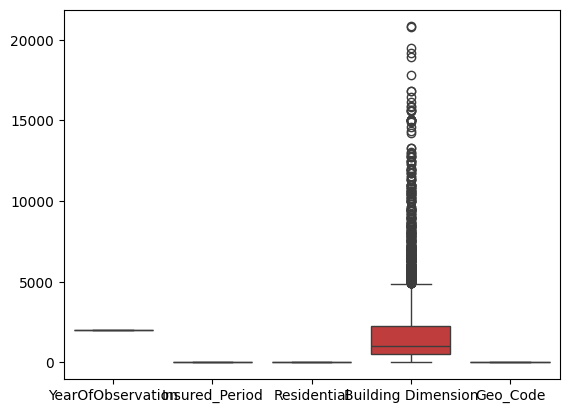

In [ ]:
sns.boxplot(data=train[l_num])
plt.show()

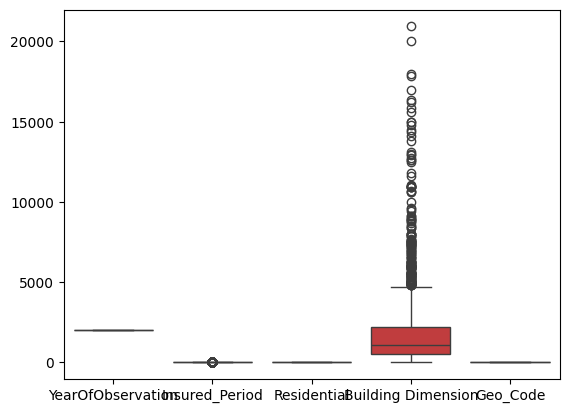

In [ ]:
sns.boxplot(data=test[l_num])
plt.show()

In [ ]:
train.describe(include='all')

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,4972,4972.000000,4972.000000,4972.000000,4972,4972,4972,4972,4972.000000,4972,4972.0,4972.000000,4972
unique,4972,NaN,NaN,NaN,2,2,2,2,NaN,4,11.0,NaN,2
top,H13501,NaN,NaN,NaN,V,N,O,R,NaN,Non-combustible,0.0,NaN,non
freq,1,NaN,NaN,NaN,3728,2502,2503,2504,NaN,2309,2469.0,NaN,3857
mean,NaN,2013.659292,0.869570,0.303500,NaN,NaN,NaN,NaN,1847.522526,NaN,NaN,4.510861,NaN
std,NaN,1.384081,0.219574,0.459815,NaN,NaN,NaN,NaN,2258.232048,NaN,NaN,2.868275,NaN
min,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN
25%,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,500.000000,NaN,NaN,2.000000,NaN
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1030.000000,NaN,NaN,4.500000,NaN
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2250.000000,NaN,NaN,7.000000,NaN


In [ ]:
def boxplot_treatment(df):
  Q1,Q3=np.percentile(df["Building Dimension"],[25,75])
  IQR=Q3-Q1
  lower_limit=max(Q1 - 1.5 * IQR, df["Building Dimension"].min()+100) # Lower_limit is -2125 building dimension can t be negatif nor close to 0
  upper_limit=Q3+1.5*IQR
  df['Building Dimension']=np.where(df['Building Dimension']>=upper_limit,
  upper_limit, np.where(df['Building Dimension']<=lower_limit,
  lower_limit,df['Building Dimension']))
  return df
train=boxplot_treatment(train)
test=boxplot_treatment(test)

In [ ]:
train.describe(include='all')

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,4972,4972.000000,4972.000000,4972.000000,4972,4972,4972,4972,4972.000000,4972,4972.0,4972.000000,4972
unique,4972,NaN,NaN,NaN,2,2,2,2,NaN,4,11.0,NaN,2
top,H13501,NaN,NaN,NaN,V,N,O,R,NaN,Non-combustible,0.0,NaN,non
freq,1,NaN,NaN,NaN,3728,2502,2503,2504,NaN,2309,2469.0,NaN,3857
mean,NaN,2013.659292,0.869570,0.303500,NaN,NaN,NaN,NaN,1605.548874,NaN,NaN,4.510861,NaN
std,NaN,1.384081,0.219574,0.459815,NaN,NaN,NaN,NaN,1427.538634,NaN,NaN,2.868275,NaN
min,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,101.000000,NaN,NaN,0.000000,NaN
25%,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,500.000000,NaN,NaN,2.000000,NaN
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1030.000000,NaN,NaN,4.500000,NaN
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2250.000000,NaN,NaN,7.000000,NaN


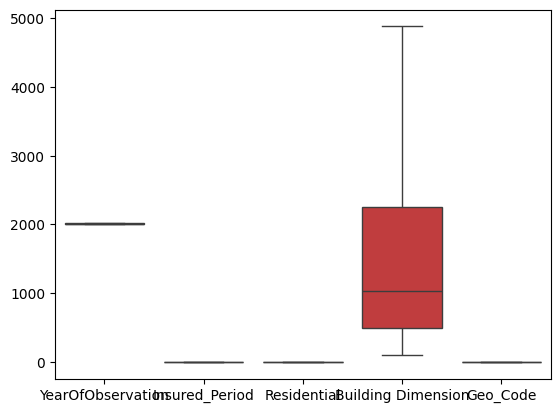

In [ ]:
sns.boxplot(data=train[l_num])
plt.show()

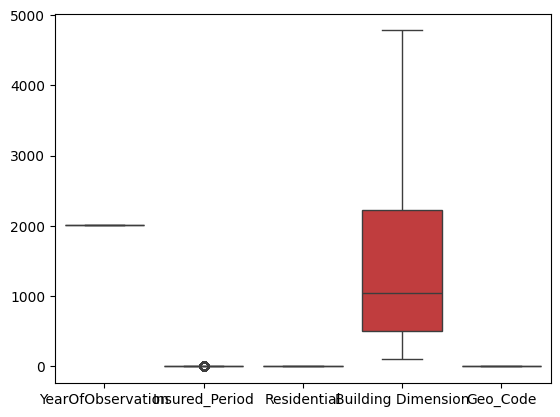

In [ ]:
sns.boxplot(data=test[l_num])
plt.show()

In [ ]:
train =train.drop('Customer Id', axis=1)
train =train.drop('YearOfObservation', axis=1) #year of observation is not important but an historical data
train

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,1,N,V,V,U,1240.0,Wood-framed,0,7.0,non
1,1.0,0,N,V,V,U,900.0,Non-combustible,0,5.0,non
2,1.0,1,V,N,O,R,4875.0,Non-combustible,4,2.0,oui
3,0.5,0,N,V,V,U,600.0,Wood-framed,0,0.0,oui
4,1.0,0,N,V,V,U,900.0,Non-combustible,0,4.0,non
...,...,...,...,...,...,...,...,...,...,...,...
5007,1.0,0,N,V,V,U,550.0,Ordinary,0,3.0,oui
5008,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,1.0,non
5009,1.0,1,V,N,O,R,480.0,Ordinary,3,9.0,non
5010,0.5,0,V,N,O,R,536.0,Fire-resistive,4,6.0,non


In [ ]:
test =test.drop('Customer Id', axis=1)
test =test.drop('YearOfObservation', axis=1)
test

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,0,V,V,V,U,3760.0,Fire-resistive,0,4.0,oui
1,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,5.0,non
2,1.0,1,V,N,O,R,1944.0,Ordinary,6,9.0,oui
3,1.0,0,N,V,V,U,2270.0,Non-combustible,0,2.0,oui
4,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,0.0,non
...,...,...,...,...,...,...,...,...,...,...,...
2142,0.5,1,V,N,O,R,862.0,Wood-framed,2,0.0,non
2143,1.0,0,V,V,V,U,400.0,Non-combustible,0,0.0,non
2144,1.0,0,V,N,O,R,730.0,Non-combustible,3,6.0,non
2145,1.0,1,N,V,V,U,568.0,Non-combustible,0,6.0,oui


In [ ]:
train1=train[train.duplicated()]
train1

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
67,1.0,0,N,V,V,U,900.0,Non-combustible,0,5.0,non
171,1.0,0,V,N,O,R,1350.0,Non-combustible,4,2.0,non
243,1.0,0,N,V,V,U,700.0,Fire-resistive,0,4.0,non
282,1.0,0,N,V,V,U,600.0,Non-combustible,0,1.0,non
361,1.0,0,V,N,O,R,3300.0,Fire-resistive,3,6.0,oui
...,...,...,...,...,...,...,...,...,...,...,...
4982,0.5,0,V,V,V,U,4875.0,Non-combustible,0,2.0,non
4994,1.0,0,V,N,O,R,4142.0,Non-combustible,>=10,4.0,non
5003,1.0,1,N,V,V,U,1176.0,Ordinary,0,9.0,oui
5005,0.5,0,N,V,V,U,300.0,Non-combustible,0,1.0,non


In [ ]:
train.drop_duplicates(inplace=True, ignore_index=True)
train

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,1,N,V,V,U,1240.0,Wood-framed,0,7.0,non
1,1.0,0,N,V,V,U,900.0,Non-combustible,0,5.0,non
2,1.0,1,V,N,O,R,4875.0,Non-combustible,4,2.0,oui
3,0.5,0,N,V,V,U,600.0,Wood-framed,0,0.0,oui
4,1.0,0,N,V,V,U,900.0,Non-combustible,0,4.0,non
...,...,...,...,...,...,...,...,...,...,...,...
4400,0.5,0,N,V,V,U,173.0,Non-combustible,0,2.0,non
4401,1.0,0,N,V,V,U,550.0,Ordinary,0,3.0,oui
4402,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,1.0,non
4403,0.5,0,V,N,O,R,536.0,Fire-resistive,4,6.0,non


In [ ]:
train1=train[train.duplicated()]
train1

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim


In [ ]:
test1=test[test.duplicated()]
test1

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
136,1.0,0,V,N,O,R,4785.0,Non-combustible,4,7.0,oui
413,1.0,1,V,V,V,U,520.0,Fire-resistive,0,3.0,non
431,1.0,0,V,V,V,U,400.0,Fire-resistive,0,8.0,non
435,1.0,1,V,N,O,R,850.0,Ordinary,4,9.0,non
474,1.0,0,N,V,V,U,680.0,Non-combustible,0,1.0,non
...,...,...,...,...,...,...,...,...,...,...,...
2106,0.5,0,V,V,V,U,4785.0,Non-combustible,0,2.0,non
2116,1.0,0,V,V,V,U,1500.0,Non-combustible,0,5.0,non
2122,1.0,0,V,V,V,U,460.0,Non-combustible,0,4.0,non
2125,1.0,0,V,V,V,U,1325.0,Ordinary,0,4.0,non


In [ ]:
test.drop_duplicates(inplace=True, ignore_index=True)
test

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,0,V,V,V,U,3760.0,Fire-resistive,0,4.0,oui
1,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,5.0,non
2,1.0,1,V,N,O,R,1944.0,Ordinary,6,9.0,oui
3,1.0,0,N,V,V,U,2270.0,Non-combustible,0,2.0,oui
4,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,0.0,non
...,...,...,...,...,...,...,...,...,...,...,...
1995,0.5,1,V,N,O,R,862.0,Wood-framed,2,0.0,non
1996,1.0,0,V,V,V,U,400.0,Non-combustible,0,0.0,non
1997,1.0,0,V,N,O,R,730.0,Non-combustible,3,6.0,non
1998,1.0,1,N,V,V,U,568.0,Non-combustible,0,6.0,oui


In [ ]:
test1=test[test.duplicated()]
test1

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim


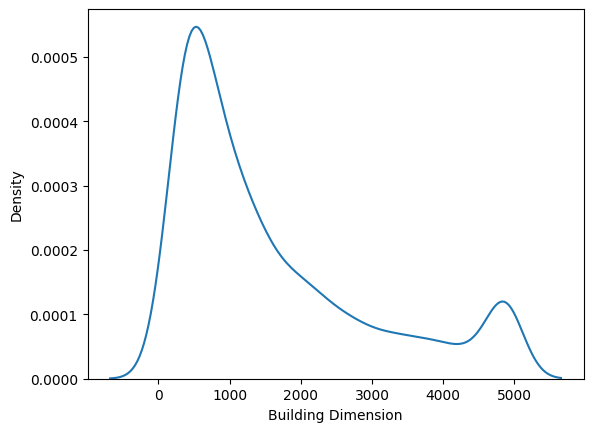

In [ ]:
sns.kdeplot(train['Building Dimension'],bw_method='scott',bw_adjust=1)
plt.show()

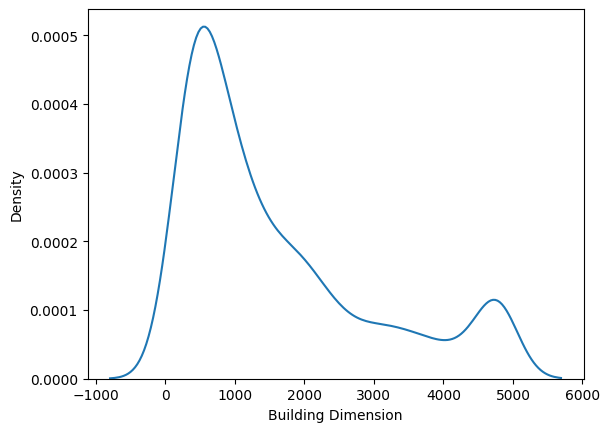

In [ ]:
sns.kdeplot(test['Building Dimension'],bw_method='scott',bw_adjust=1)
plt.show()

In [ ]:
#sns.kdeplot(train['YearOfObservation'],bw_method='scott',bw_adjust=1)
#plt.show()

In [ ]:
#sns.kdeplot(test['YearOfObservation'],bw_method='scott',bw_adjust=1)
#plt.show()

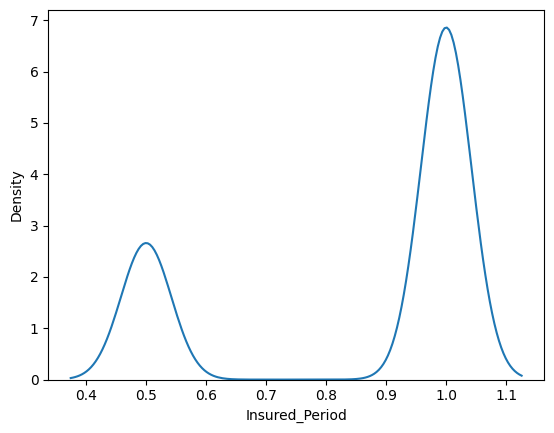

In [ ]:
sns.kdeplot(train['Insured_Period'],bw_method='scott',bw_adjust=1)
plt.show()

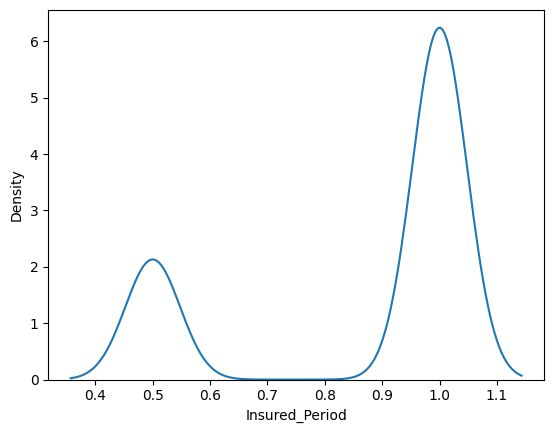

In [ ]:
sns.kdeplot(test['Insured_Period'],bw_method='scott',bw_adjust=1)
plt.show()

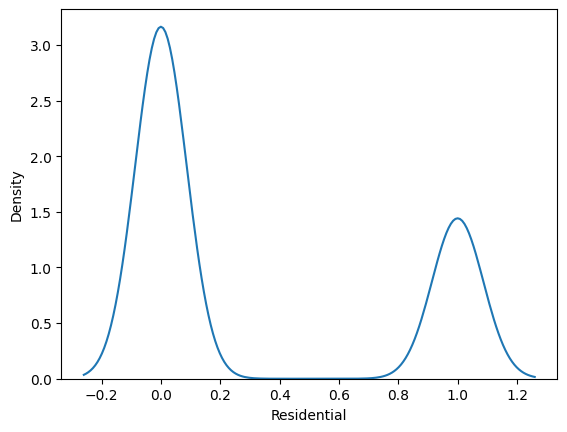

In [ ]:
sns.kdeplot(train['Residential'],bw_method='scott',bw_adjust=1)
plt.show()

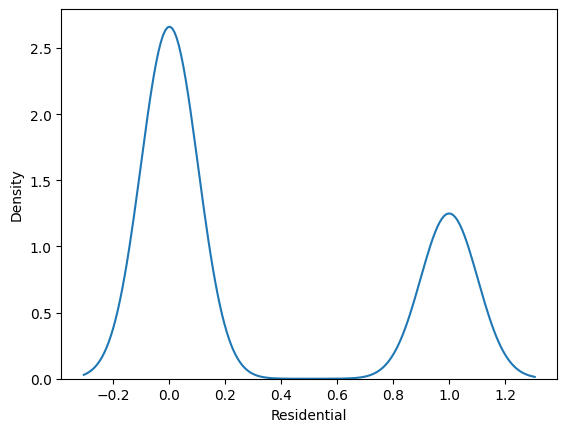

In [ ]:
sns.kdeplot(test['Residential'],bw_method='scott',bw_adjust=1)
plt.show()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train[["Building_Painted"]]=enc.fit_transform(
train.loc[:,["Building_Painted"]])
train

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,1,0.0,V,V,U,1240.0,Wood-framed,0,7.0,non
1,1.0,0,0.0,V,V,U,900.0,Non-combustible,0,5.0,non
2,1.0,1,1.0,N,O,R,4875.0,Non-combustible,4,2.0,oui
3,0.5,0,0.0,V,V,U,600.0,Wood-framed,0,0.0,oui
4,1.0,0,0.0,V,V,U,900.0,Non-combustible,0,4.0,non
...,...,...,...,...,...,...,...,...,...,...,...
4400,0.5,0,0.0,V,V,U,173.0,Non-combustible,0,2.0,non
4401,1.0,0,0.0,V,V,U,550.0,Ordinary,0,3.0,oui
4402,0.5,0,1.0,N,O,R,1000.0,Fire-resistive,4,1.0,non
4403,0.5,0,1.0,N,O,R,536.0,Fire-resistive,4,6.0,non


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train[["Building_Fenced"]]=enc.fit_transform(
train.loc[:,["Building_Fenced"]])
train

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,1,0.0,1.0,V,U,1240.0,Wood-framed,0,7.0,non
1,1.0,0,0.0,1.0,V,U,900.0,Non-combustible,0,5.0,non
2,1.0,1,1.0,0.0,O,R,4875.0,Non-combustible,4,2.0,oui
3,0.5,0,0.0,1.0,V,U,600.0,Wood-framed,0,0.0,oui
4,1.0,0,0.0,1.0,V,U,900.0,Non-combustible,0,4.0,non
...,...,...,...,...,...,...,...,...,...,...,...
4400,0.5,0,0.0,1.0,V,U,173.0,Non-combustible,0,2.0,non
4401,1.0,0,0.0,1.0,V,U,550.0,Ordinary,0,3.0,oui
4402,0.5,0,1.0,0.0,O,R,1000.0,Fire-resistive,4,1.0,non
4403,0.5,0,1.0,0.0,O,R,536.0,Fire-resistive,4,6.0,non


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train[["Garden"]]=enc.fit_transform(
train.loc[:,["Garden"]])
train

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,1,0.0,1.0,1.0,U,1240.0,Wood-framed,0,7.0,non
1,1.0,0,0.0,1.0,1.0,U,900.0,Non-combustible,0,5.0,non
2,1.0,1,1.0,0.0,0.0,R,4875.0,Non-combustible,4,2.0,oui
3,0.5,0,0.0,1.0,1.0,U,600.0,Wood-framed,0,0.0,oui
4,1.0,0,0.0,1.0,1.0,U,900.0,Non-combustible,0,4.0,non
...,...,...,...,...,...,...,...,...,...,...,...
4400,0.5,0,0.0,1.0,1.0,U,173.0,Non-combustible,0,2.0,non
4401,1.0,0,0.0,1.0,1.0,U,550.0,Ordinary,0,3.0,oui
4402,0.5,0,1.0,0.0,0.0,R,1000.0,Fire-resistive,4,1.0,non
4403,0.5,0,1.0,0.0,0.0,R,536.0,Fire-resistive,4,6.0,non


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train[["Settlement"]]=enc.fit_transform(
train.loc[:,["Settlement"]])
train

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,1,0.0,1.0,1.0,1.0,1240.0,Wood-framed,0,7.0,non
1,1.0,0,0.0,1.0,1.0,1.0,900.0,Non-combustible,0,5.0,non
2,1.0,1,1.0,0.0,0.0,0.0,4875.0,Non-combustible,4,2.0,oui
3,0.5,0,0.0,1.0,1.0,1.0,600.0,Wood-framed,0,0.0,oui
4,1.0,0,0.0,1.0,1.0,1.0,900.0,Non-combustible,0,4.0,non
...,...,...,...,...,...,...,...,...,...,...,...
4400,0.5,0,0.0,1.0,1.0,1.0,173.0,Non-combustible,0,2.0,non
4401,1.0,0,0.0,1.0,1.0,1.0,550.0,Ordinary,0,3.0,oui
4402,0.5,0,1.0,0.0,0.0,0.0,1000.0,Fire-resistive,4,1.0,non
4403,0.5,0,1.0,0.0,0.0,0.0,536.0,Fire-resistive,4,6.0,non


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train[["Residential"]]=enc.fit_transform(
train.loc[:,["Residential"]])
train

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,1.0,0.0,1.0,1.0,1.0,1240.0,Wood-framed,0,7.0,non
1,1.0,0.0,0.0,1.0,1.0,1.0,900.0,Non-combustible,0,5.0,non
2,1.0,1.0,1.0,0.0,0.0,0.0,4875.0,Non-combustible,4,2.0,oui
3,0.5,0.0,0.0,1.0,1.0,1.0,600.0,Wood-framed,0,0.0,oui
4,1.0,0.0,0.0,1.0,1.0,1.0,900.0,Non-combustible,0,4.0,non
...,...,...,...,...,...,...,...,...,...,...,...
4400,0.5,0.0,0.0,1.0,1.0,1.0,173.0,Non-combustible,0,2.0,non
4401,1.0,0.0,0.0,1.0,1.0,1.0,550.0,Ordinary,0,3.0,oui
4402,0.5,0.0,1.0,0.0,0.0,0.0,1000.0,Fire-resistive,4,1.0,non
4403,0.5,0.0,1.0,0.0,0.0,0.0,536.0,Fire-resistive,4,6.0,non


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train[["Claim"]]=enc.fit_transform(
train.loc[:,["Claim"]])
train


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,1.0,0.0,1.0,1.0,1.0,1240.0,Wood-framed,0,7.0,0.0
1,1.0,0.0,0.0,1.0,1.0,1.0,900.0,Non-combustible,0,5.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,4875.0,Non-combustible,4,2.0,1.0
3,0.5,0.0,0.0,1.0,1.0,1.0,600.0,Wood-framed,0,0.0,1.0
4,1.0,0.0,0.0,1.0,1.0,1.0,900.0,Non-combustible,0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4400,0.5,0.0,0.0,1.0,1.0,1.0,173.0,Non-combustible,0,2.0,0.0
4401,1.0,0.0,0.0,1.0,1.0,1.0,550.0,Ordinary,0,3.0,1.0
4402,0.5,0.0,1.0,0.0,0.0,0.0,1000.0,Fire-resistive,4,1.0,0.0
4403,0.5,0.0,1.0,0.0,0.0,0.0,536.0,Fire-resistive,4,6.0,0.0


In [ ]:
test


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,0,V,V,V,U,3760.0,Fire-resistive,0,4.0,oui
1,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,5.0,non
2,1.0,1,V,N,O,R,1944.0,Ordinary,6,9.0,oui
3,1.0,0,N,V,V,U,2270.0,Non-combustible,0,2.0,oui
4,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,0.0,non
...,...,...,...,...,...,...,...,...,...,...,...
1995,0.5,1,V,N,O,R,862.0,Wood-framed,2,0.0,non
1996,1.0,0,V,V,V,U,400.0,Non-combustible,0,0.0,non
1997,1.0,0,V,N,O,R,730.0,Non-combustible,3,6.0,non
1998,1.0,1,N,V,V,U,568.0,Non-combustible,0,6.0,oui


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
test[["Building_Painted"]]=enc.fit_transform(
test.loc[:,["Building_Painted"]])
test

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,0,1.0,V,V,U,3760.0,Fire-resistive,0,4.0,oui
1,1.0,0,1.0,N,O,R,1452.0,Fire-resistive,5,5.0,non
2,1.0,1,1.0,N,O,R,1944.0,Ordinary,6,9.0,oui
3,1.0,0,0.0,V,V,U,2270.0,Non-combustible,0,2.0,oui
4,0.5,0,1.0,N,O,R,2976.0,Fire-resistive,9,0.0,non
...,...,...,...,...,...,...,...,...,...,...,...
1995,0.5,1,1.0,N,O,R,862.0,Wood-framed,2,0.0,non
1996,1.0,0,1.0,V,V,U,400.0,Non-combustible,0,0.0,non
1997,1.0,0,1.0,N,O,R,730.0,Non-combustible,3,6.0,non
1998,1.0,1,0.0,V,V,U,568.0,Non-combustible,0,6.0,oui


In [ ]:

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
test[["Building_Fenced"]]=enc.fit_transform(
test.loc[:,["Building_Fenced"]])
test

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,0,1.0,1.0,V,U,3760.0,Fire-resistive,0,4.0,oui
1,1.0,0,1.0,0.0,O,R,1452.0,Fire-resistive,5,5.0,non
2,1.0,1,1.0,0.0,O,R,1944.0,Ordinary,6,9.0,oui
3,1.0,0,0.0,1.0,V,U,2270.0,Non-combustible,0,2.0,oui
4,0.5,0,1.0,0.0,O,R,2976.0,Fire-resistive,9,0.0,non
...,...,...,...,...,...,...,...,...,...,...,...
1995,0.5,1,1.0,0.0,O,R,862.0,Wood-framed,2,0.0,non
1996,1.0,0,1.0,1.0,V,U,400.0,Non-combustible,0,0.0,non
1997,1.0,0,1.0,0.0,O,R,730.0,Non-combustible,3,6.0,non
1998,1.0,1,0.0,1.0,V,U,568.0,Non-combustible,0,6.0,oui


In [ ]:

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
test[["Garden"]]=enc.fit_transform(
test.loc[:,["Garden"]])
test

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,0,1.0,1.0,1.0,U,3760.0,Fire-resistive,0,4.0,oui
1,1.0,0,1.0,0.0,0.0,R,1452.0,Fire-resistive,5,5.0,non
2,1.0,1,1.0,0.0,0.0,R,1944.0,Ordinary,6,9.0,oui
3,1.0,0,0.0,1.0,1.0,U,2270.0,Non-combustible,0,2.0,oui
4,0.5,0,1.0,0.0,0.0,R,2976.0,Fire-resistive,9,0.0,non
...,...,...,...,...,...,...,...,...,...,...,...
1995,0.5,1,1.0,0.0,0.0,R,862.0,Wood-framed,2,0.0,non
1996,1.0,0,1.0,1.0,1.0,U,400.0,Non-combustible,0,0.0,non
1997,1.0,0,1.0,0.0,0.0,R,730.0,Non-combustible,3,6.0,non
1998,1.0,1,0.0,1.0,1.0,U,568.0,Non-combustible,0,6.0,oui


In [ ]:

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
test[["Settlement"]]=enc.fit_transform(
test.loc[:,["Settlement"]])
test


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,0,1.0,1.0,1.0,1.0,3760.0,Fire-resistive,0,4.0,oui
1,1.0,0,1.0,0.0,0.0,0.0,1452.0,Fire-resistive,5,5.0,non
2,1.0,1,1.0,0.0,0.0,0.0,1944.0,Ordinary,6,9.0,oui
3,1.0,0,0.0,1.0,1.0,1.0,2270.0,Non-combustible,0,2.0,oui
4,0.5,0,1.0,0.0,0.0,0.0,2976.0,Fire-resistive,9,0.0,non
...,...,...,...,...,...,...,...,...,...,...,...
1995,0.5,1,1.0,0.0,0.0,0.0,862.0,Wood-framed,2,0.0,non
1996,1.0,0,1.0,1.0,1.0,1.0,400.0,Non-combustible,0,0.0,non
1997,1.0,0,1.0,0.0,0.0,0.0,730.0,Non-combustible,3,6.0,non
1998,1.0,1,0.0,1.0,1.0,1.0,568.0,Non-combustible,0,6.0,oui


In [ ]:

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
test[["Residential"]]=enc.fit_transform(
test.loc[:,["Residential"]])
test

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,0.0,1.0,1.0,1.0,1.0,3760.0,Fire-resistive,0,4.0,oui
1,1.0,0.0,1.0,0.0,0.0,0.0,1452.0,Fire-resistive,5,5.0,non
2,1.0,1.0,1.0,0.0,0.0,0.0,1944.0,Ordinary,6,9.0,oui
3,1.0,0.0,0.0,1.0,1.0,1.0,2270.0,Non-combustible,0,2.0,oui
4,0.5,0.0,1.0,0.0,0.0,0.0,2976.0,Fire-resistive,9,0.0,non
...,...,...,...,...,...,...,...,...,...,...,...
1995,0.5,1.0,1.0,0.0,0.0,0.0,862.0,Wood-framed,2,0.0,non
1996,1.0,0.0,1.0,1.0,1.0,1.0,400.0,Non-combustible,0,0.0,non
1997,1.0,0.0,1.0,0.0,0.0,0.0,730.0,Non-combustible,3,6.0,non
1998,1.0,1.0,0.0,1.0,1.0,1.0,568.0,Non-combustible,0,6.0,oui


In [ ]:

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
test[["Claim"]]=enc.fit_transform(
test.loc[:,["Claim"]])
test

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,0.0,1.0,1.0,1.0,1.0,3760.0,Fire-resistive,0,4.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1452.0,Fire-resistive,5,5.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,1944.0,Ordinary,6,9.0,1.0
3,1.0,0.0,0.0,1.0,1.0,1.0,2270.0,Non-combustible,0,2.0,1.0
4,0.5,0.0,1.0,0.0,0.0,0.0,2976.0,Fire-resistive,9,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0.5,1.0,1.0,0.0,0.0,0.0,862.0,Wood-framed,2,0.0,0.0
1996,1.0,0.0,1.0,1.0,1.0,1.0,400.0,Non-combustible,0,0.0,0.0
1997,1.0,0.0,1.0,0.0,0.0,0.0,730.0,Non-combustible,3,6.0,0.0
1998,1.0,1.0,0.0,1.0,1.0,1.0,568.0,Non-combustible,0,6.0,1.0


In [ ]:
test = pd.get_dummies(test, columns=['Building_Type'], dtype='int32', prefix='', prefix_sep='')
claim_column = test.pop('Claim')
test = pd.concat([test, claim_column], axis=1)
test

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,NumberOfWindows,Geo_Code,Fire-resistive,Non-combustible,Ordinary,Wood-framed,Claim
0,1.0,0.0,1.0,1.0,1.0,1.0,3760.0,0,4.0,1,0,0,0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1452.0,5,5.0,1,0,0,0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,1944.0,6,9.0,0,0,1,0,1.0
3,1.0,0.0,0.0,1.0,1.0,1.0,2270.0,0,2.0,0,1,0,0,1.0
4,0.5,0.0,1.0,0.0,0.0,0.0,2976.0,9,0.0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.5,1.0,1.0,0.0,0.0,0.0,862.0,2,0.0,0,0,0,1,0.0
1996,1.0,0.0,1.0,1.0,1.0,1.0,400.0,0,0.0,0,1,0,0,0.0
1997,1.0,0.0,1.0,0.0,0.0,0.0,730.0,3,6.0,0,1,0,0,0.0
1998,1.0,1.0,0.0,1.0,1.0,1.0,568.0,0,6.0,0,1,0,0,1.0


In [ ]:
train = pd.get_dummies(train, columns=['Building_Type'], dtype='int32', prefix='', prefix_sep='')
claim_column = train.pop('Claim')
train = pd.concat([train, claim_column], axis=1)
train

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,NumberOfWindows,Geo_Code,Fire-resistive,Non-combustible,Ordinary,Wood-framed,Claim
0,1.0,1.0,0.0,1.0,1.0,1.0,1240.0,0,7.0,0,0,0,1,0.0
1,1.0,0.0,0.0,1.0,1.0,1.0,900.0,0,5.0,0,1,0,0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,4875.0,4,2.0,0,1,0,0,1.0
3,0.5,0.0,0.0,1.0,1.0,1.0,600.0,0,0.0,0,0,0,1,1.0
4,1.0,0.0,0.0,1.0,1.0,1.0,900.0,0,4.0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400,0.5,0.0,0.0,1.0,1.0,1.0,173.0,0,2.0,0,1,0,0,0.0
4401,1.0,0.0,0.0,1.0,1.0,1.0,550.0,0,3.0,0,0,1,0,1.0
4402,0.5,0.0,1.0,0.0,0.0,0.0,1000.0,4,1.0,1,0,0,0,0.0
4403,0.5,0.0,1.0,0.0,0.0,0.0,536.0,4,6.0,1,0,0,0,0.0


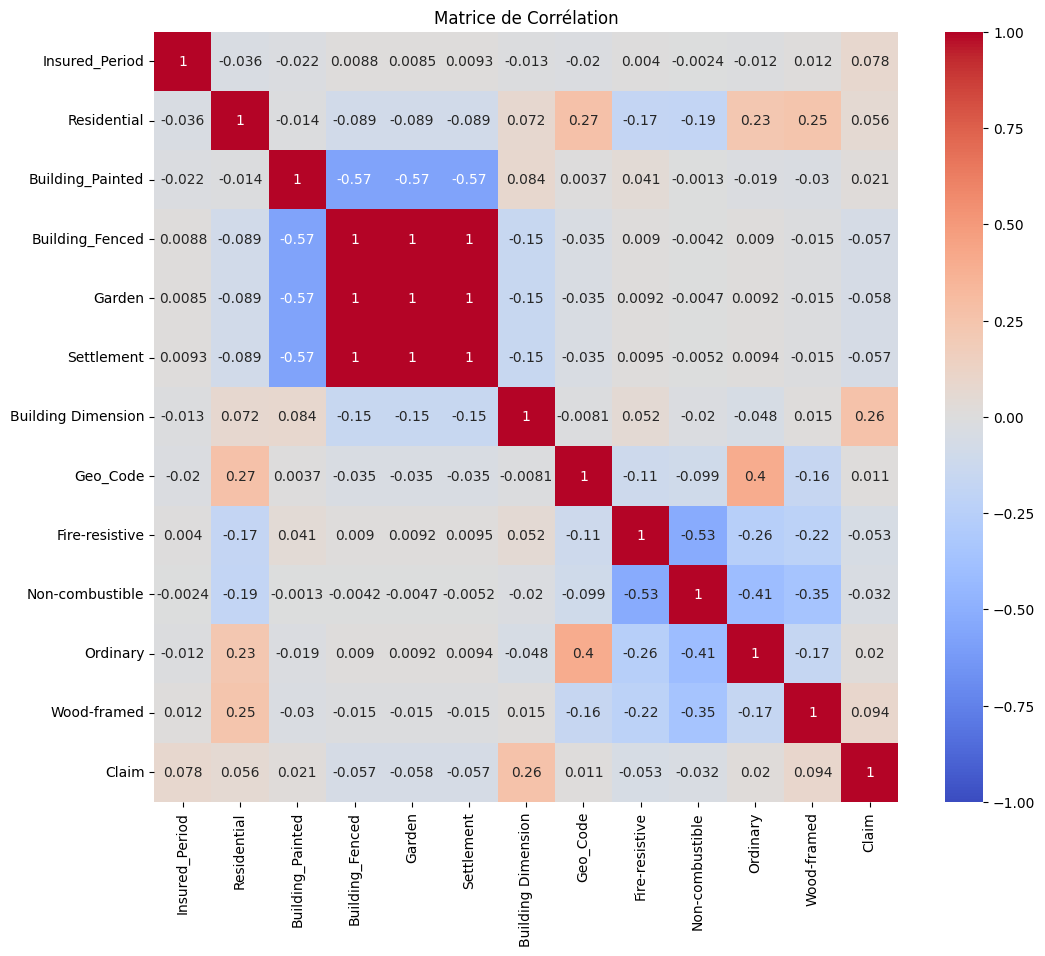

In [ ]:

df_train = train.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(df_train, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.title('Matrice de Corrélation')
plt.show()



In [ ]:
test

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,NumberOfWindows,Geo_Code,Fire-resistive,Non-combustible,Ordinary,Wood-framed,Claim
0,1.0,0.0,1.0,1.0,1.0,1.0,3760.0,0,4.0,1,0,0,0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1452.0,5,5.0,1,0,0,0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,1944.0,6,9.0,0,0,1,0,1.0
3,1.0,0.0,0.0,1.0,1.0,1.0,2270.0,0,2.0,0,1,0,0,1.0
4,0.5,0.0,1.0,0.0,0.0,0.0,2976.0,9,0.0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.5,1.0,1.0,0.0,0.0,0.0,862.0,2,0.0,0,0,0,1,0.0
1996,1.0,0.0,1.0,1.0,1.0,1.0,400.0,0,0.0,0,1,0,0,0.0
1997,1.0,0.0,1.0,0.0,0.0,0.0,730.0,3,6.0,0,1,0,0,0.0
1998,1.0,1.0,0.0,1.0,1.0,1.0,568.0,0,6.0,0,1,0,0,1.0


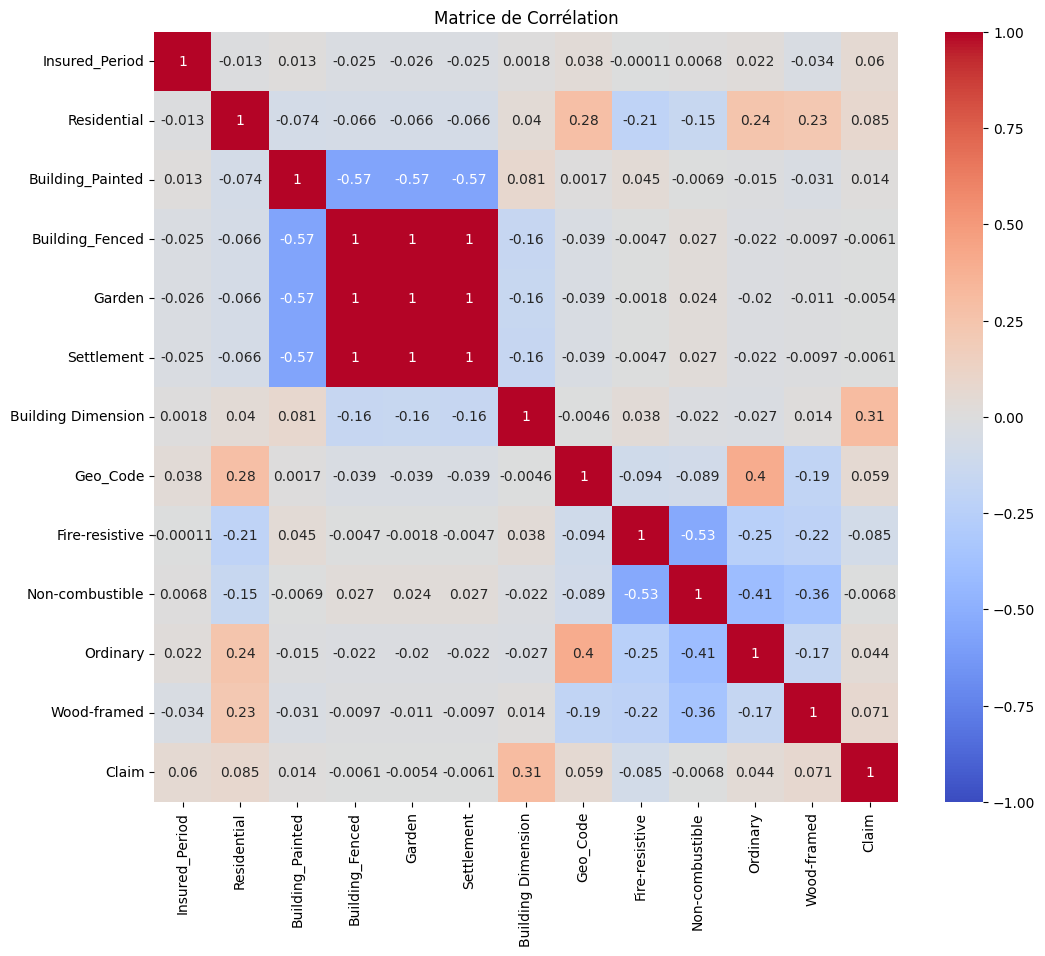

In [ ]:
df_test= test.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(df_test, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.title('Matrice de Corrélation')
plt.show()

In [ ]:
test['NumberOfWindows'] = test['NumberOfWindows'].replace('>=10', 10)
test['NumberOfWindows'] = pd.to_numeric(test['NumberOfWindows']).astype('float64')
train['NumberOfWindows'] = train['NumberOfWindows'].replace('>=10', 10)
train['NumberOfWindows'] = pd.to_numeric(train['NumberOfWindows']).astype('float64')
X_train = train.iloc[:, :-1].values
Y_train = train.iloc[:, -1].values
X_test = test.iloc[:, :-1].values
Y_test = test.iloc[:, -1].values


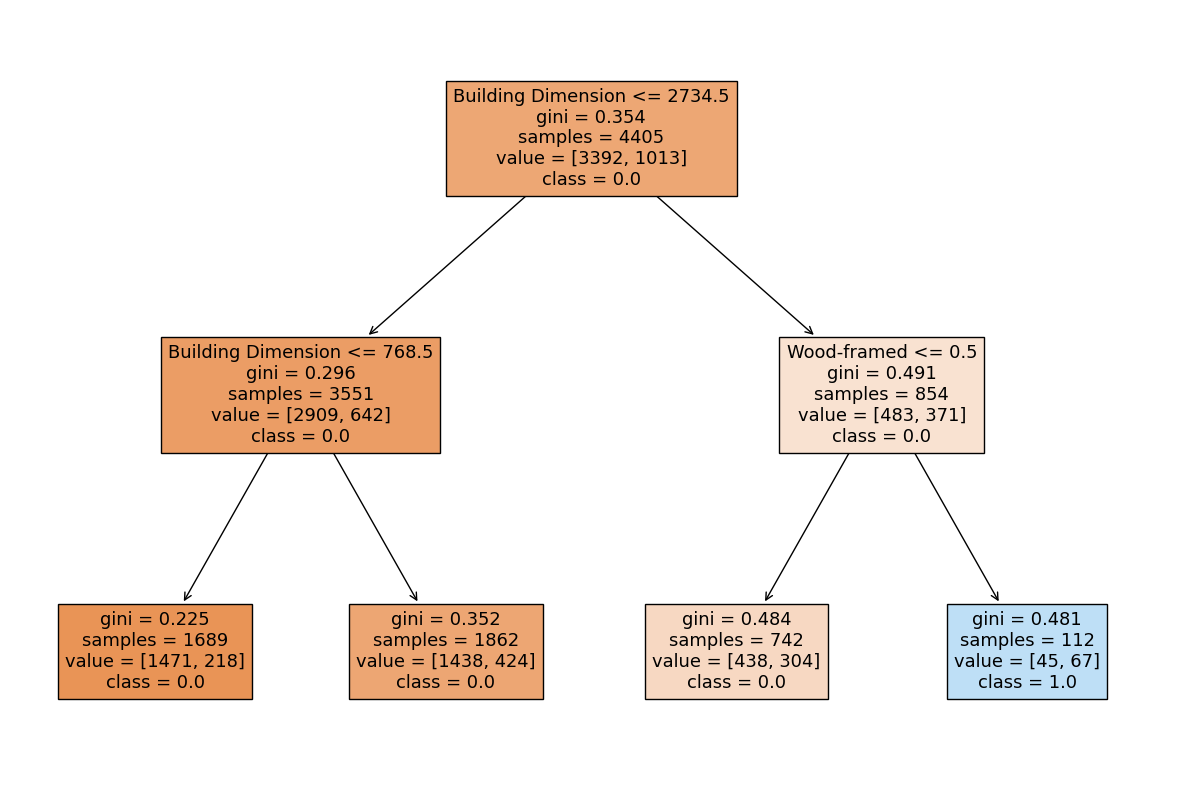

|--- Building Dimension <= 2734.50
|   |--- Building Dimension <= 768.50
|   |   |--- class: 0.0
|   |--- Building Dimension >  768.50
|   |   |--- class: 0.0
|--- Building Dimension >  2734.50
|   |--- Wood-framed <= 0.50
|   |   |--- class: 0.0
|   |--- Wood-framed >  0.50
|   |   |--- class: 1.0



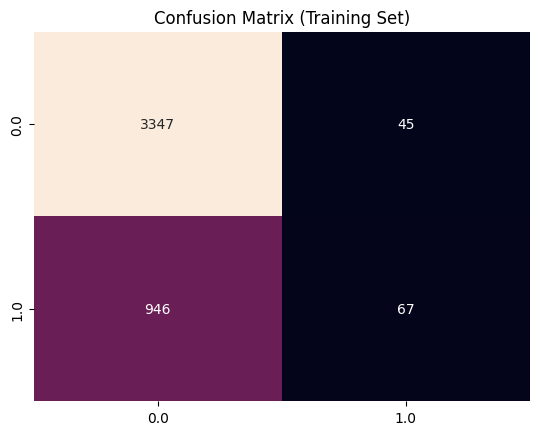

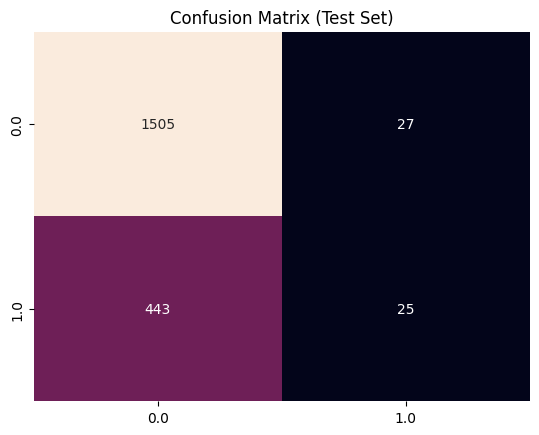

Accuracy on the test set: 76.50%
Training and testing completed.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, Y_train, X_test, Y_test, and train are defined

# Train the decision tree classifier
cls = DecisionTreeClassifier(max_depth=2)
cls.fit(X_train, Y_train)

# Visualize the decision tree
fig = plt.figure(figsize=(15, 10))
plot_tree(cls, feature_names=list(train)[:-1], class_names=[str(cls_class) for cls_class in cls.classes_], filled=True)
plt.show()

# Export text representation of the decision tree
print(export_text(cls, feature_names=list(train)[:-1]))

# Make predictions on the training set
Y_p_train = cls.predict(X_train)
c_m_train = confusion_matrix(Y_train, Y_p_train)

# Visualize the confusion matrix for the training set
sns.heatmap(c_m_train, annot=True, cbar=False, xticklabels=[str(cls_class) for cls_class in cls.classes_], yticklabels=[str(cls_class) for cls_class in cls.classes_], fmt='d')
plt.title('Confusion Matrix (Training Set)')
plt.show()

# Make predictions on the test set
Y_p_test = cls.predict(X_test)
c_m_test = confusion_matrix(Y_test, Y_p_test)

# Calculate accuracy for the test set
accuracy_test = accuracy_score(Y_test, Y_p_test)

# Visualize the confusion matrix for the test set
sns.heatmap(c_m_test, annot=True, cbar=False, xticklabels=[str(cls_class) for cls_class in cls.classes_], yticklabels=[str(cls_class) for cls_class in cls.classes_], fmt='d')
plt.title('Confusion Matrix (Test Set)')
plt.show()

print(f"Accuracy on the test set: {accuracy_test:.2%}")
print("Training and testing completed.")


[0.77258727 0.48076923] [0.98237598 0.0534188 ] [0.86494253 0.09615385] [1532  468]


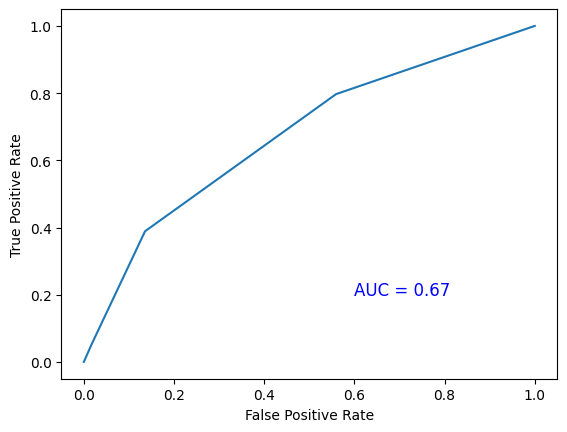

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, roc_curve, roc_auc_score
precision,recall,f1,occ= precision_recall_fscore_support(Y_test,
Y_p_test, average=None)
print(precision, recall, f1, occ)
y_prob=cls.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(Y_test,y_prob,pos_label=1)
auc = roc_auc_score(Y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.6, 0.2, f'AUC = {auc:.2f}',
 color='blue',fontsize=12)
plt.show()

In [ ]:
complement_recall = 1 - recall
print("Class-wise complement of recall:")
for i, class_label in enumerate(cls.classes_):
    print(f"Class {class_label}: {complement_recall[i]:.2%}")
complement_precision = 1 - precision
print("Class-wise complement of precision:")
for i, class_label in enumerate(cls.classes_):
    print(f"Class {class_label}: {complement_precision[i]:.2%}")

Class-wise complement of recall:
Class 0.0: 1.76%
Class 1.0: 94.66%
Class-wise complement of precision:
Class 0.0: 22.74%
Class 1.0: 51.92%


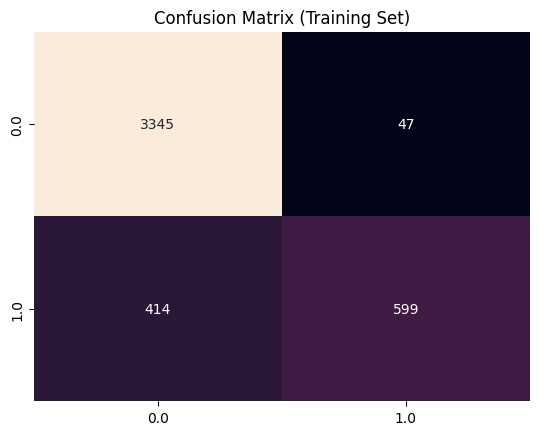

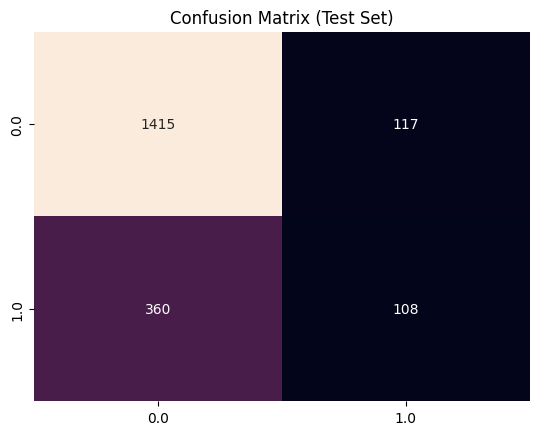

Accuracy on the test set: 76.15%
Training and testing completed.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, Y_train, X_test, Y_test, and train are defined

# Train the RandomForestClassifier
cls = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',

    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_leaf_nodes=None,
    bootstrap=True,
    oob_score=True,
    max_samples=0.53
)
cls.fit(X_train, Y_train)

# Make predictions on the training set
Y_p_train = cls.predict(X_train)
c_m_train = confusion_matrix(Y_train, Y_p_train)

# Visualize the confusion matrix for the training set
sns.heatmap(c_m_train, annot=True, cbar=False, xticklabels=cls.classes_, yticklabels=cls.classes_, fmt='d')
plt.title('Confusion Matrix (Training Set)')
plt.show()

# Make predictions on the test set
Y_p_test = cls.predict(X_test)
c_m_test = confusion_matrix(Y_test, Y_p_test)

# Calculate accuracy for the test set
accuracy_test = accuracy_score(Y_test, Y_p_test)

# Visualize the confusion matrix for the test set
sns.heatmap(c_m_test, annot=True, cbar=False, xticklabels=cls.classes_, yticklabels=cls.classes_, fmt='d')
plt.title('Confusion Matrix (Test Set)')
plt.show()

print(f"Accuracy on the test set: {accuracy_test:.2%}")
print("Training and testing completed.")


In [ ]:
from sklearn.ensemble import RandomForestClassifier

cls= RandomForestClassifier(n_estimators=100,
    criterion='gini',
    class_weight='balanced', max_depth=None, min_samples_split=2,
 min_samples_leaf=1,max_features='sqrt',max_leaf_nodes=None,
bootstrap=True, oob_score=True, max_samples=0.53 )
cls.fit(X_train, Y_train)


RandomForestClassifier(class_weight='balanced', max_samples=0.53,
                       oob_score=True)

[[3311   81]
 [ 378  635]]


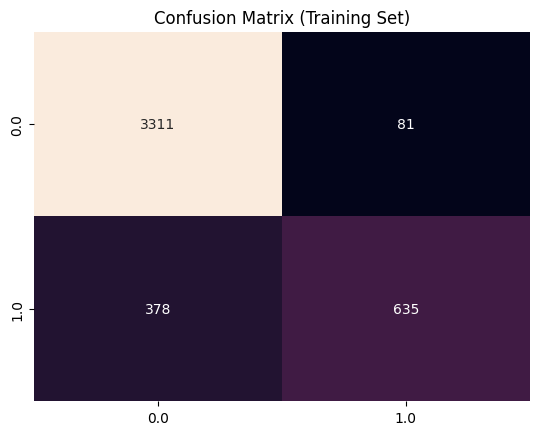

[[1405  127]
 [ 358  110]]


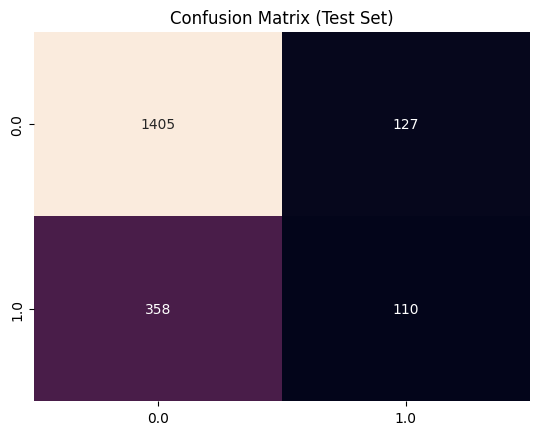

Accuracy on the test set: 75.75%
Training and testing completed.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt



# Make predictions on the training set
Y_p_train = cls.predict(X_train)
c_m_train = confusion_matrix(Y_train, Y_p_train)
print(c_m_train)
# Visualize the confusion matrix for the training set
sns.heatmap(c_m_train, annot=True, cbar=False, xticklabels=cls.classes_, yticklabels=cls.classes_, fmt='d')
plt.title('Confusion Matrix (Training Set)')
plt.show()

# Make predictions on the test set
Y_p_test = cls.predict(X_test)
c_m_test = confusion_matrix(Y_test, Y_p_test)

# Calculate accuracy for the test set
accuracy_test = accuracy_score(Y_test, Y_p_test)
print(c_m_test)
# Visualize the confusion matrix for the test set
sns.heatmap(c_m_test, annot=True, cbar=False, xticklabels=cls.classes_, yticklabels=cls.classes_, fmt='d')
plt.title('Confusion Matrix (Test Set)')
plt.show()

print(f"Accuracy on the test set: {accuracy_test:.2%}")
print("Training and testing completed.")


In [ ]:
train.describe(include='all')

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,NumberOfWindows,Geo_Code,Fire-resistive,Non-combustible,Ordinary,Wood-framed,Claim
count,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.00000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000
mean,0.860272,0.313053,0.759137,0.487174,0.486947,0.48672,1590.009762,2.217934,4.540068,0.248127,0.457889,0.165721,0.128263,0.229966
std,0.224391,0.463789,0.427656,0.499892,0.499886,0.49988,1390.080658,2.512041,2.860604,0.431975,0.498280,0.371872,0.334421,0.420858
min,0.500000,0.000000,0.000000,0.000000,0.000000,0.00000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,1.000000,0.000000,0.000000,0.00000,500.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1050.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2225.000000,4.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,4875.000000,10.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
'''
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, Y_train, X_test, Y_test, and train are defined

# Solution 1: Original model
cls = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_leaf_nodes=None,
    bootstrap=True,
    oob_score=True,
    max_samples=0.53
)
cls.fit(X_train, Y_train)

# Make predictions on the test set
Y_p_test = cls.predict(X_test)
c_m_test = confusion_matrix(Y_test, Y_p_test)

# Visualize the confusion matrix for the test set
sns.heatmap(c_m_test, annot=True, cbar=False, xticklabels=cls.classes_, yticklabels=cls.classes_, fmt='d')
plt.title('Confusion Matrix (Test Set) - Original Model')
plt.show()

# Calculate accuracy for the test set
accuracy_test = accuracy_score(Y_test, Y_p_test)
print(f"Accuracy on the test set: {accuracy_test:.2%}")

# Solution 2: Over-sampling the minority class ("no" class)
# Using RandomOverSampler for class 0.0 only
ros = RandomOverSampler(sampling_strategy={1.0: 6000})
X_train_resampled, Y_train_resampled = ros.fit_resample(X_train, Y_train)

cls.fit(X_train_resampled, Y_train_resampled)
Y_p_test = cls.predict(X_test)
c_m_test = confusion_matrix(Y_test, Y_p_test)

sns.heatmap(c_m_test, annot=True, cbar=False, xticklabels=cls.classes_, yticklabels=cls.classes_, fmt='d')
plt.title('Confusion Matrix (Test Set) - Over-sampling "no" class')
plt.show()

# Calculate accuracy for the test set
accuracy_test = accuracy_score(Y_test, Y_p_test)
print(f"Accuracy on the test set (with over-sampling): {accuracy_test:.2%}")
'''


'\nimport pandas as pd\nimport numpy as np\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import confusion_matrix, accuracy_score\nfrom imblearn.over_sampling import RandomOverSampler\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Assuming X_train, Y_train, X_test, Y_test, and train are defined\n\n# Solution 1: Original model\ncls = RandomForestClassifier(\n    n_estimators=100,\n    criterion=\'gini\',\n    max_depth=None,\n    min_samples_split=2,\n    min_samples_leaf=1,\n    max_features=\'sqrt\',\n    max_leaf_nodes=None,\n    bootstrap=True,\n    oob_score=True,\n    max_samples=0.53\n)\ncls.fit(X_train, Y_train)\n\n# Make predictions on the test set\nY_p_test = cls.predict(X_test)\nc_m_test = confusion_matrix(Y_test, Y_p_test)\n\n# Visualize the confusion matrix for the test set\nsns.heatmap(c_m_test, annot=True, cbar=False, xticklabels=cls.classes_, yticklabels=cls.classes_, fmt=\'d\')\nplt.title(\'Confusion Matrix (Test Set) - Original

In [ ]:
'''
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, Y_train, X_test, Y_test, and train are defined

# Solution 1: Original model
cls = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_leaf_nodes=None,
    bootstrap=True,
    oob_score=True,
    max_samples=0.53
)
cls.fit(X_train, Y_train)

# Make predictions on the test set
Y_p_test = cls.predict(X_test)
c_m_test = confusion_matrix(Y_test, Y_p_test)

# Visualize the confusion matrix for the test set
sns.heatmap(c_m_test, annot=True, cbar=False, xticklabels=cls.classes_, yticklabels=cls.classes_, fmt='d')
plt.title('Confusion Matrix (Test Set) - Original Model')
plt.show()

# Calculate accuracy for the test set
accuracy_test = accuracy_score(Y_test, Y_p_test)
print(f"Accuracy on the test set: {accuracy_test:.2%}")

# Solution 3: Under-sampling the majority class ("yes" class)
# Using RandomUnderSampler for class 1.0 only
rus = RandomUnderSampler(sampling_strategy={0.0: 1000})
X_train_resampled, Y_train_resampled = rus.fit_resample(X_train, Y_train)

cls.fit(X_train_resampled, Y_train_resampled)
Y_p_test = cls.predict(X_test)
c_m_test = confusion_matrix(Y_test, Y_p_test)

sns.heatmap(c_m_test, annot=True, cbar=False, xticklabels=cls.classes_, yticklabels=cls.classes_, fmt='d')
plt.title('Confusion Matrix (Test Set) - Under-sampling "yes" class')
plt.show()

# Calculate accuracy for the test set
accuracy_test = accuracy_score(Y_test, Y_p_test)
print(f"Accuracy on the test set (with under-sampling): {accuracy_test:.2%}")
'''


'\nimport pandas as pd\nimport numpy as np\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import confusion_matrix, accuracy_score\nfrom imblearn.under_sampling import RandomUnderSampler\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Assuming X_train, Y_train, X_test, Y_test, and train are defined\n\n# Solution 1: Original model\ncls = RandomForestClassifier(\n    n_estimators=100,\n    criterion=\'gini\',\n    max_depth=None,\n    min_samples_split=2,\n    min_samples_leaf=1,\n    max_features=\'sqrt\',\n    max_leaf_nodes=None,\n    bootstrap=True,\n    oob_score=True,\n    max_samples=0.53\n)\ncls.fit(X_train, Y_train)\n\n# Make predictions on the test set\nY_p_test = cls.predict(X_test)\nc_m_test = confusion_matrix(Y_test, Y_p_test)\n\n# Visualize the confusion matrix for the test set\nsns.heatmap(c_m_test, annot=True, cbar=False, xticklabels=cls.classes_, yticklabels=cls.classes_, fmt=\'d\')\nplt.title(\'Confusion Matrix (Test Set) - Origin

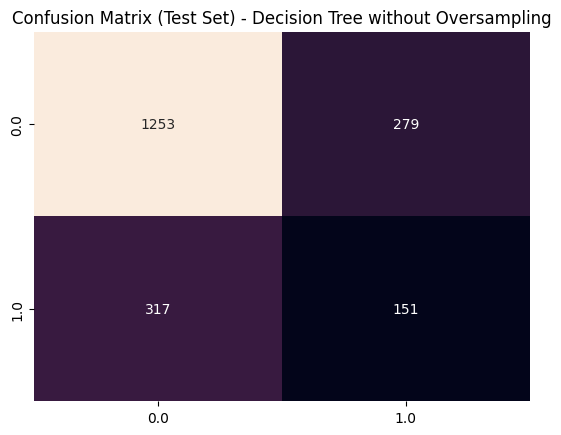

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81      1532
         1.0       0.35      0.32      0.34       468

    accuracy                           0.70      2000
   macro avg       0.57      0.57      0.57      2000
weighted avg       0.69      0.70      0.70      2000

Accuracy on the test set: 70.20%

Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      1532
         1.0       0.33      0.36      0.34       468

    accuracy                           0.68      2000
   macro avg       0.57      0.57      0.57      2000
weighted avg       0.69      0.68      0.69      2000

Accuracy on the test set (Adjusted Threshold): 68.20%


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have X_train, X_test, Y_train, Y_test ready

# Train a DecisionTreeClassifier with 'entropy' criterion on the training data
cls = DecisionTreeClassifier(criterion='entropy', random_state=42)
cls.fit(X_train, Y_train)

# Make predictions on the test set
Y_p_test = cls.predict(X_test)
c_m_test = confusion_matrix(Y_test, Y_p_test)

# Visualize the confusion matrix for the test set
sns.heatmap(c_m_test, annot=True, cbar=False, xticklabels=cls.classes_, yticklabels=cls.classes_, fmt='d')
plt.title('Confusion Matrix (Test Set) - Decision Tree without Oversampling')
plt.show()

# Print classification report for more detailed metrics
print("Classification Report:")
print(classification_report(Y_test, Y_p_test))

# Calculate accuracy for the test set
accuracy_test = accuracy_score(Y_test, Y_p_test)
print(f"Accuracy on the test set: {accuracy_test:.2%}")

# Adjust the decision threshold and evaluate the impact
threshold = 0.0005  # Adjust this threshold as needed
Y_p_test_adjusted = (cls.predict_proba(X_test)[:, 1] > threshold).astype(int)

# Assess the impact on the classification report and accuracy
print("\nClassification Report (Adjusted Threshold):")
print(classification_report(Y_test, Y_p_test_adjusted))

accuracy_test_adjusted = accuracy_score(Y_test, Y_p_test_adjusted)
print(f"Accuracy on the test set (Adjusted Threshold): {accuracy_test_adjusted:.2%}")
